In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import os
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in", "ytick.direction": "in"})


In [5]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')

metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]

In [230]:
ultau=np.append(0,10**(np.array(tau[1:])-9))

In [31]:
def SFH(AGE,TAU):
    return AGE*np.exp(-AGE/TAU)

In [6]:
g_grid = np.zeros([metal.size,age.size,len(tau)])
for i in range(metal.size):
    g_grid[i]=np.load('../data/m%s_gbf.npy' % metal[i]).T

In [7]:
g_grid.shape

(29, 56, 31)

In [24]:
g_dist= g_grid[17].T[1:7]

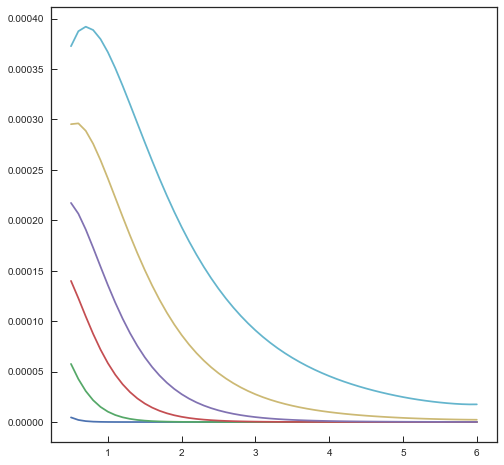

In [240]:
%matplotlib inline

plt.figure(figsize=[8,8])
for i in range(len(g_dist)):
#     plt.figure(figsize=[8,8])
    plt.plot(age,g_dist[i][::-1]*SFH(age,ultau[i+1]))

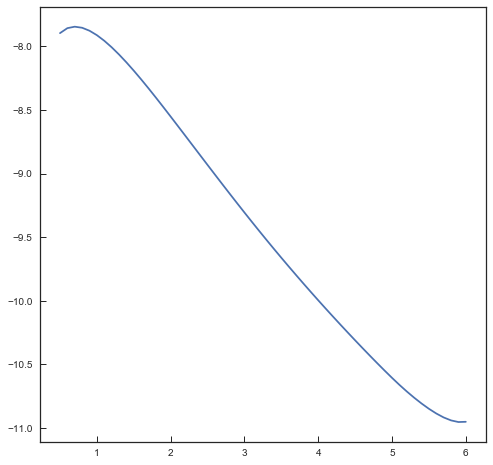

In [245]:
plt.figure(figsize=[8,8])
plt.plot(age,np.log(g_dist[5][::-1]*SFH(age,ultau[6])))
# plt.plot(age,np.exp(-2*age/(.1)))

In [80]:
param = np.polyfit(age,np.log(g_dist[0]),2)
fit = np.polyval(param,age)

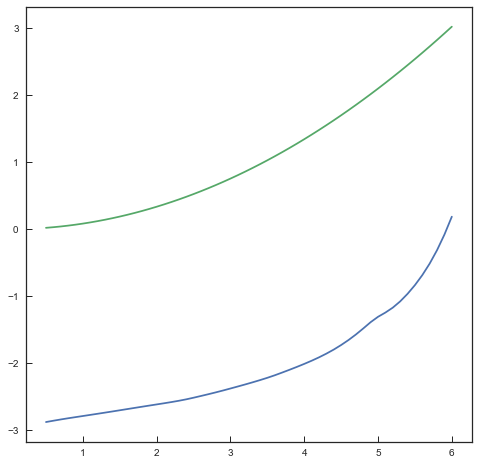

In [222]:
plt.figure(figsize=[8,8])
plt.plot(age,np.log(gdist/C))
plt.plot(age,.084*(age)**2)


# plt.figure(figsize=[8,8])
# # plt.plot(age,np.log(g_dist[0]))
# # plt.plot(age,fit)
# plt.plot(age,age**2/.01)

# ci=np.trapz(x=age,y=np.exp(-0.45*age**3))

# plt.figure(figsize=[8,8])
# plt.plot(age,g_dist[0]/C)
# plt.plot(age,np.exp(-.45*age**3)/ci)


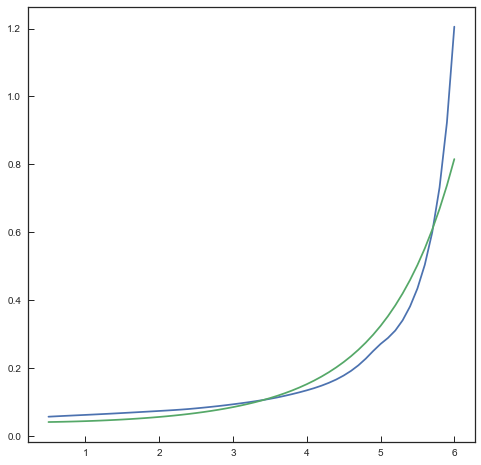

In [224]:
ci=np.trapz(x=age,y=np.exp(0.084*age**2))

plt.figure(figsize=[8,8])
plt.plot(age,gdist/C)
plt.plot(age,np.exp(0.084*age**2)/ci)

In [220]:
C=np.trapz(x=age,y=gdist)

c_gdist = np.zeros(len(gdist))
for i in range(len(gdist)):
    if i == 0:
        c_gdist[i] = gdist[i]/C
    else:
        c_gdist[i] = c_gdist[i-1] + gdist[i]/C

ks = []
rng = np.arange(.05,0.1,.001)
for i in rng:
    test = np.exp(i*age**2)
    ci=np.trapz(x=age,y=test)
    test /= ci
    c_test = np.zeros(len(test))
    for ii in range(len(test)):
        if ii == 0:
            c_test[ii] = test[ii]
        else:
            c_test[ii] = c_test[ii-1] + test[ii]
    ks.append(max(np.abs(c_gdist-c_test)))
            

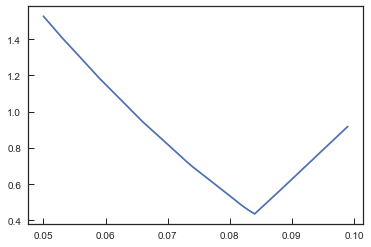

In [221]:
plt.plot(rng,ks)

[-9.17761283 -7.42408506]
[-4.11136748 -7.52800668]
[-2.35096954 -7.57169886]
[-1.51436803 -7.54677113]
[-0.98142554 -7.46082057]
[-0.64634049 -7.32853739]


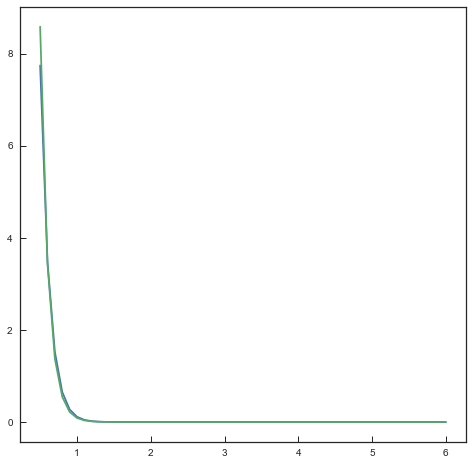

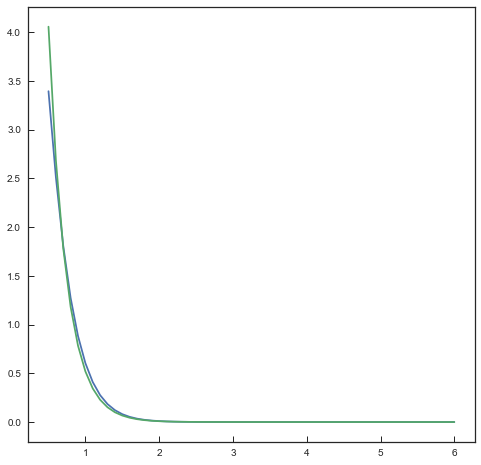

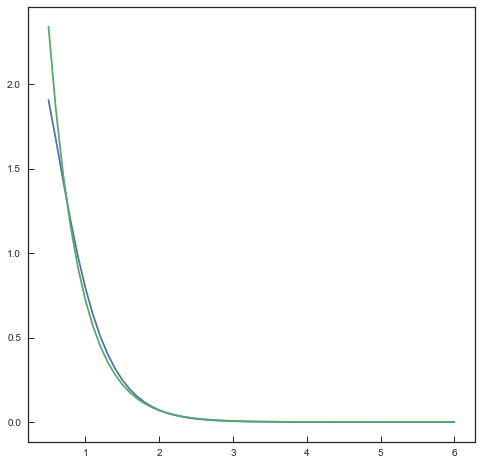

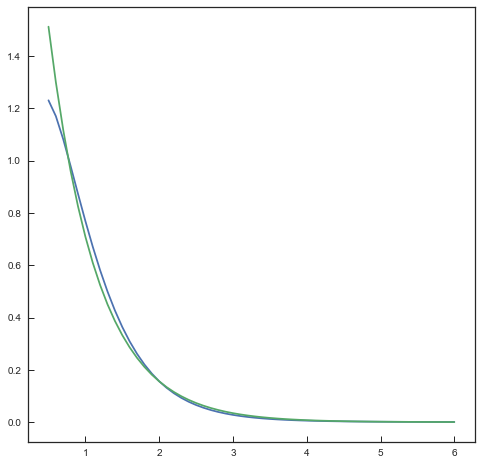

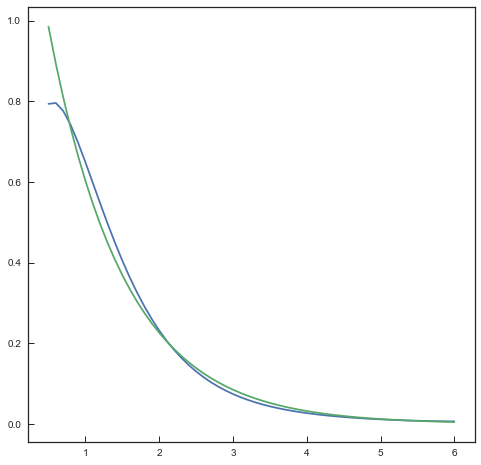

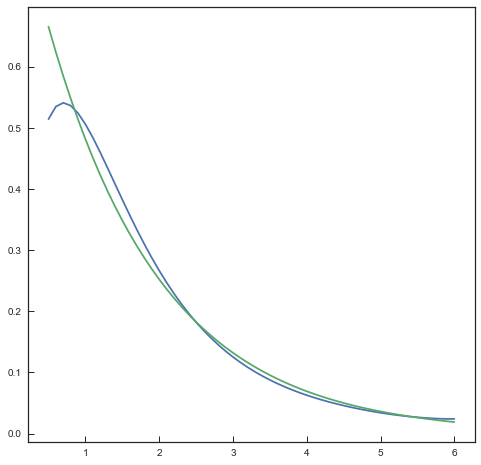

In [247]:
for i in range(len(g_dist)):
    C=np.trapz(x=age,y=g_dist[i][::-1]*SFH(age,ultau[i+1]))
    param = np.polyfit(age,np.log(g_dist[i][::-1]*SFH(age,ultau[i+1])),1)
    fit = np.polyval(param,age)
    ci=np.trapz(x=age,y=np.exp(fit))
    print param
    plt.figure(figsize=[8,8])
    plt.plot(age,g_dist[i][::-1]*SFH(age,ultau[i+1])/C)
    plt.plot(age,np.exp(fit)/ci)